In [1]:
import os
import pandas as pd
import numpy as np
from csaps import csaps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [2]:
def new_pre(ind):
    if ind < 10:
        files = os.listdir(f"D:/REU_2024/BigIdeas/00{ind}/glucose_activity")
    if ind > 9:
        files = os.listdir(f"D:/REU_2024/BigIdeas/0{ind}/glucose_activity")

    if not files:
        print(f"Skipping {ind}: No bouts found.")
        return np.array([]), np.array([]), np.array([])
    df_list = []
    A = []
    T = np.arange(0, 65, 5)
    glucose = []
    
    for bout in files:
        if ind < 10:
            df = pd.read_csv(f"D:/REU_2024/BigIdeas/00{ind}/glucose_activity/{bout}")
        if ind > 9:
            df = pd.read_csv(f"D:/REU_2024/BigIdeas/0{ind}/glucose_activity/{bout}")

        df = df.tail(13) # We only select the one hour period after activity has ended
        
        if len(df) < 13:
            continue
            
        df.reset_index(drop=True, inplace=True)
        random_perturbation = np.random.normal(0, 0.01)
        df['period_duration (mins)'] = df['period_duration (mins)'] + random_perturbation
        
        if df['period_duration (mins)'].iloc[0] > 180:
            continue
            
        A.append(df['period_duration (mins)'].iloc[0])
        df['d_glucose'] = df['glucose'] - df['glucose'].iloc[0]
        df_list.append(df)
        glucose.append(list(df['d_glucose']))
    
    sorted_dflist = sorted(df_list, key=lambda x: x['period_duration (mins)'].iloc[0])
    df_list = sorted_dflist
    
    A = sorted(A)
    glucose = np.array(glucose)
    T = np.array(T)
    A = np.array(A)
    
    return glucose, A, T

In [3]:
# Plots request (1). from Dr. Jianping
def GAM_slicer_fixed_duration(ind, lam, fixed_durations=[5, 10, 15, 20, 30]):
    
    glucose, A, T = new_pre(ind)

    if glucose.size == 0 or A.size == 0 or T.size == 0:
        print(f"Individual {ind} has no activity bouts.")
        return None
    if A.size == 1:
        print(f"Individual {ind} has only 1 activity bout.")
        return None

    xdata = [A, T]
    ydata = np.array(glucose)
    i, j = np.meshgrid(A, T)
    i, j = i.T, j.T
    X_domain = np.linspace(A.min(), A.max(), 501)
    Y_domain = np.linspace(T.min(), T.max(), 500)
    domain = [X_domain, Y_domain]
    model = csaps(xdata, ydata, smooth = lam)
    y_data_s = model(domain)
    X, Y = np.meshgrid(X_domain, Y_domain)
    X, Y = X.T, Y.T

    T_domain = np.linspace(Y.min(), Y.max(), 500)
    plt.figure(figsize=(10, 6))
    plt.title(f'Glucose Variation vs. Time Since Activity Ended for Individual {ind}')
    plt.xlabel('Time since activity ended (min)')
    plt.ylabel('Glucose Variation (mg/dL)')

    for duration in fixed_durations:
        closest_index = np.argmin(np.abs(X[:, 0] - duration))
        closest_value = X[closest_index, 0]

        if abs(closest_value - duration) > 5:
            print(f"Skipping duration {duration} for individual {ind} due to deviation.")
            continue

        print(f"Closest index for duration {duration}: {closest_index}, X value: {closest_value}")

        glucose_slice = y_data_s[closest_index, :]
        plt.plot(T_domain, glucose_slice, label=f'Duration {duration} min')

    plt.legend()
    plt.grid(True)
    plt.show()

Closest index for duration 5: 0, X value: 5.594176388552471
Closest index for duration 10: 170, X value: 9.995212952520962
Closest index for duration 15: 363, X value: 14.991683875144012
Closest index for duration 20: 500, X value: 18.53840157669509
Skipping duration 30 for individual 1 due to deviation.


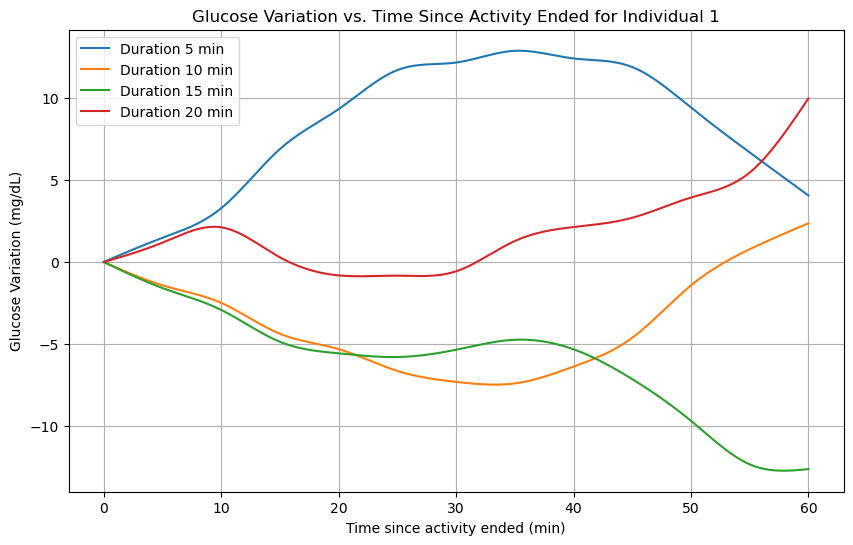

Closest index for duration 5: 0, X value: 5.242563945175676
Closest index for duration 10: 71, X value: 9.980895247171482
Closest index for duration 15: 146, X value: 14.986174791533248
Closest index for duration 20: 221, X value: 19.991454335895014
Closest index for duration 30: 371, X value: 30.002013424618546


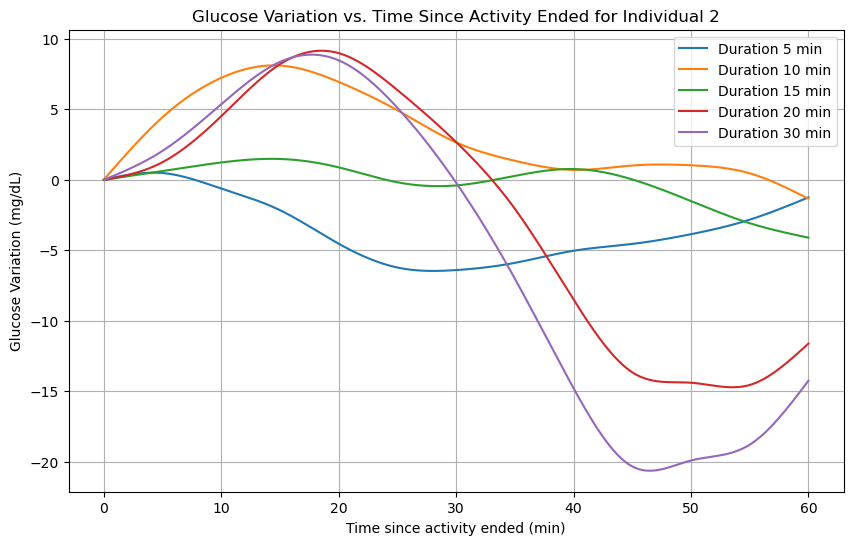

Skipping 3: No bouts found.
Individual 3 has no activity bouts.
Closest index for duration 5: 0, X value: 5.010551411994611
Closest index for duration 10: 93, X value: 9.979810487035271
Closest index for duration 15: 187, X value: 15.002502455355938
Closest index for duration 20: 281, X value: 20.025194423676606
Closest index for duration 30: 468, X value: 30.017145467037935


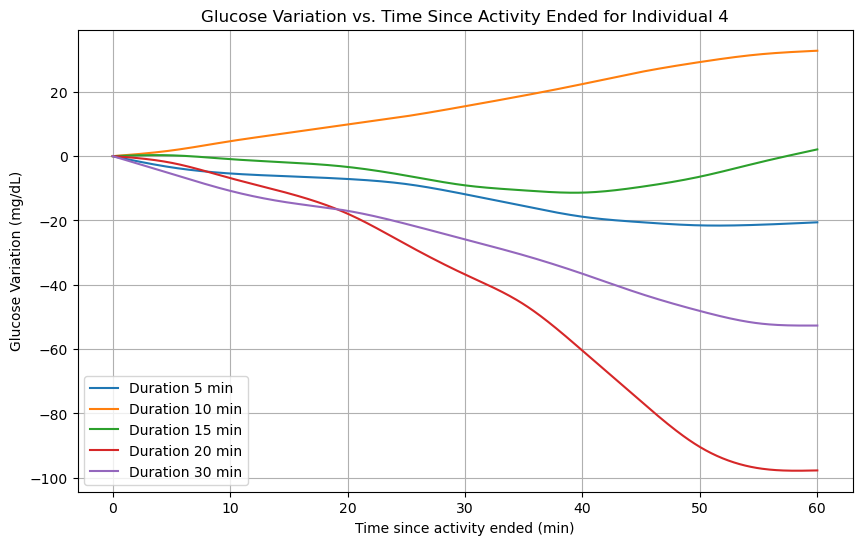

Closest index for duration 5: 0, X value: 5.139978642104181
Closest index for duration 10: 500, X value: 7.347193051174966
Skipping duration 15 for individual 5 due to deviation.
Skipping duration 20 for individual 5 due to deviation.
Skipping duration 30 for individual 5 due to deviation.


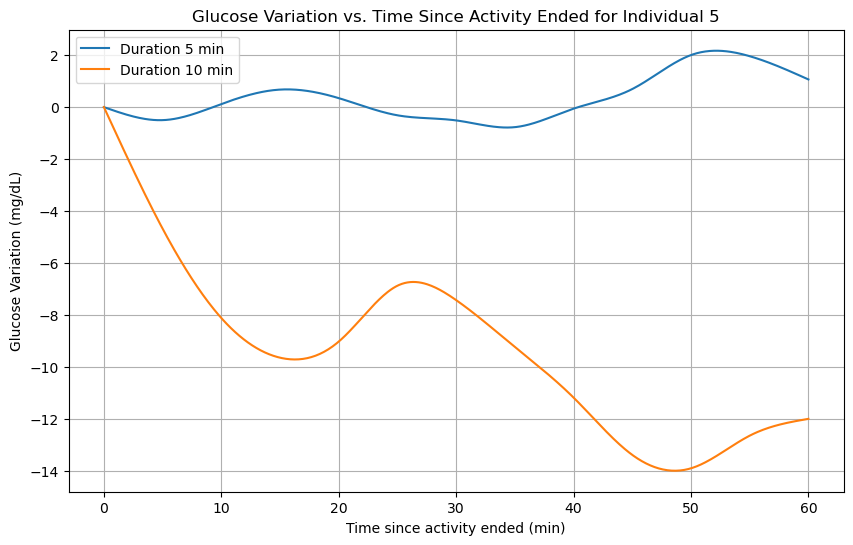

Closest index for duration 5: 0, X value: 5.134202025659442
Closest index for duration 10: 246, X value: 10.008421359204302
Closest index for duration 15: 498, X value: 15.001524091128307
Closest index for duration 20: 500, X value: 15.04115189058802
Skipping duration 30 for individual 6 due to deviation.


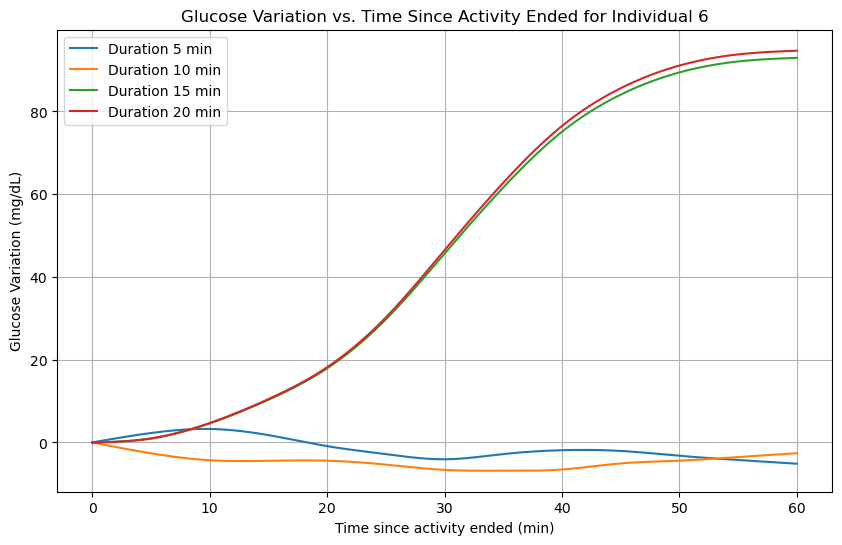

Closest index for duration 5: 0, X value: 5.249044438470386
Closest index for duration 10: 152, X value: 10.003788262702502
Closest index for duration 15: 312, X value: 15.008781761894202
Closest index for duration 20: 472, X value: 20.013775261085904
Skipping duration 30 for individual 7 due to deviation.


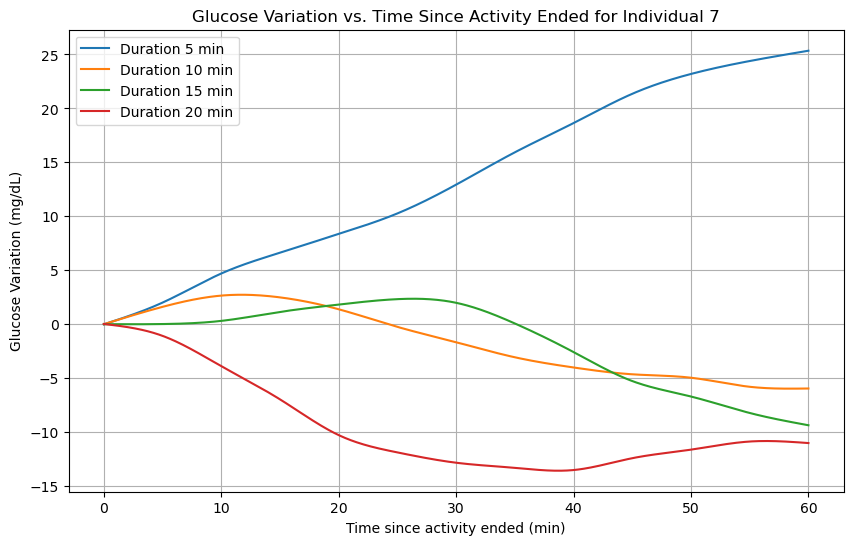

Closest index for duration 5: 0, X value: 5.0008319220517325
Closest index for duration 10: 206, X value: 10.003200749162387
Closest index for duration 15: 412, X value: 15.005569576273041
Closest index for duration 20: 500, X value: 17.142503832514485
Skipping duration 30 for individual 8 due to deviation.


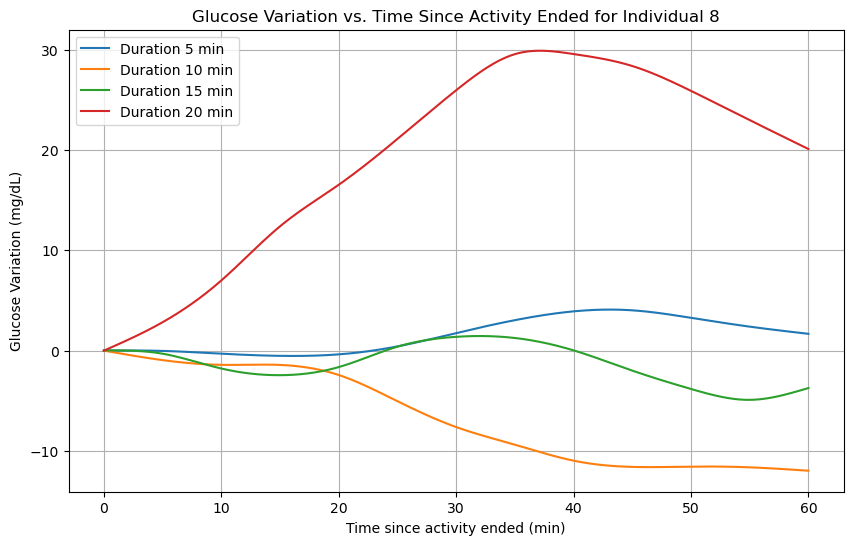

Closest index for duration 5: 0, X value: 5.011847018681726
Closest index for duration 10: 183, X value: 10.005346036451197
Closest index for duration 15: 366, X value: 14.998845054220668
Closest index for duration 20: 500, X value: 18.655286957942575
Skipping duration 30 for individual 9 due to deviation.


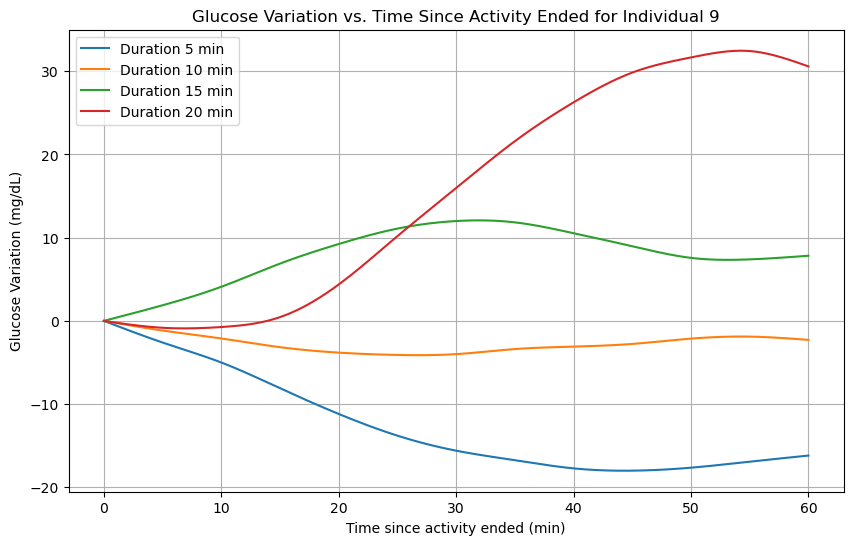

Closest index for duration 5: 0, X value: 5.610274061106857
Closest index for duration 10: 401, X value: 10.004257254761447
Closest index for duration 15: 500, X value: 11.089056098082654
Skipping duration 20 for individual 10 due to deviation.
Skipping duration 30 for individual 10 due to deviation.


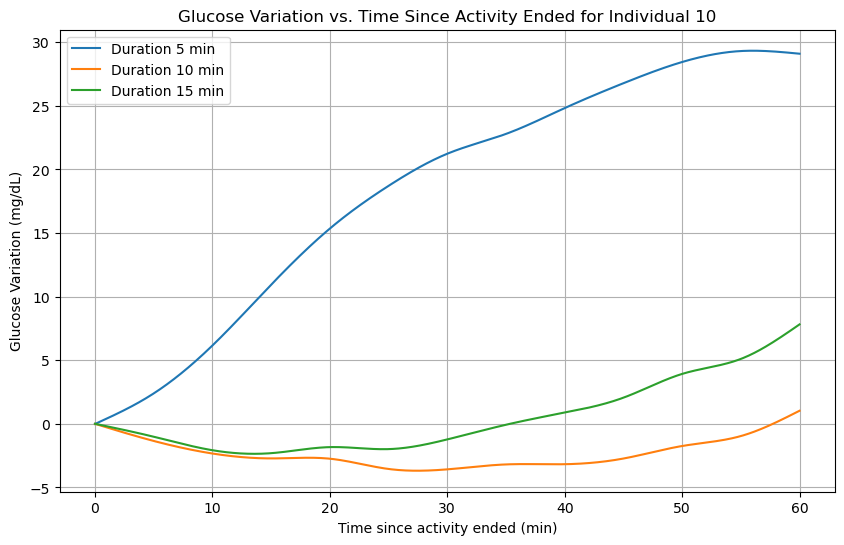

Closest index for duration 5: 0, X value: 5.01059397090247
Closest index for duration 10: 62, X value: 10.015599564321843
Closest index for duration 15: 124, X value: 15.020605157741215
Closest index for duration 20: 186, X value: 20.025610751160585
Closest index for duration 30: 310, X value: 30.03562193799933


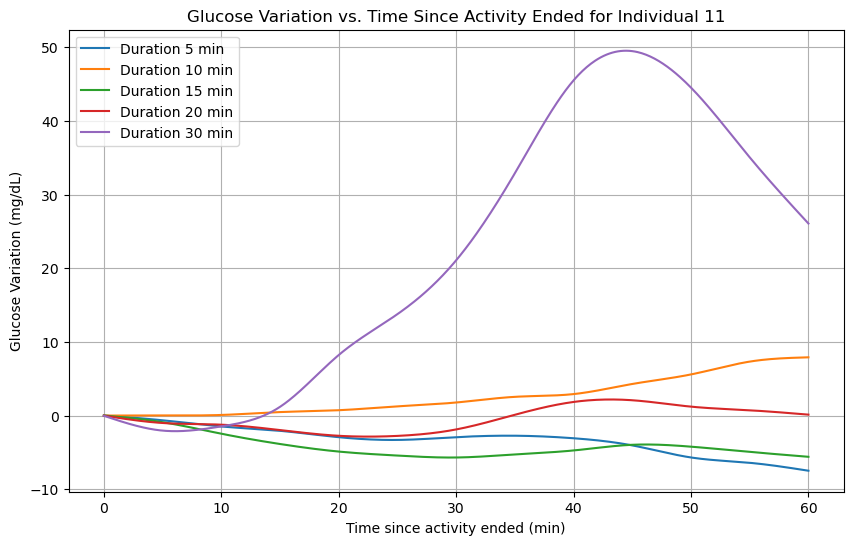

Skipping 12: No bouts found.
Individual 12 has no activity bouts.
Closest index for duration 5: 0, X value: 5.1251109492906135
Closest index for duration 10: 63, X value: 9.977761872808829
Closest index for duration 15: 128, X value: 14.984465206597465
Closest index for duration 20: 193, X value: 19.9911685403861
Closest index for duration 30: 323, X value: 30.00457520796337


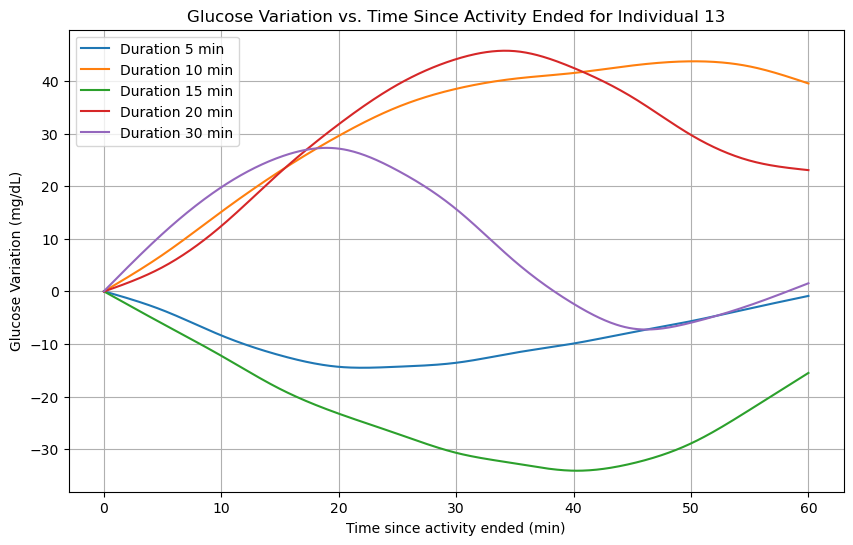

Skipping 14: No bouts found.
Individual 14 has no activity bouts.
Closest index for duration 5: 0, X value: 4.999402876879149
Closest index for duration 10: 99, X value: 9.994698257172065
Closest index for duration 15: 198, X value: 14.98999363746498
Closest index for duration 20: 297, X value: 19.985289017757896
Closest index for duration 30: 495, X value: 29.975879778343728


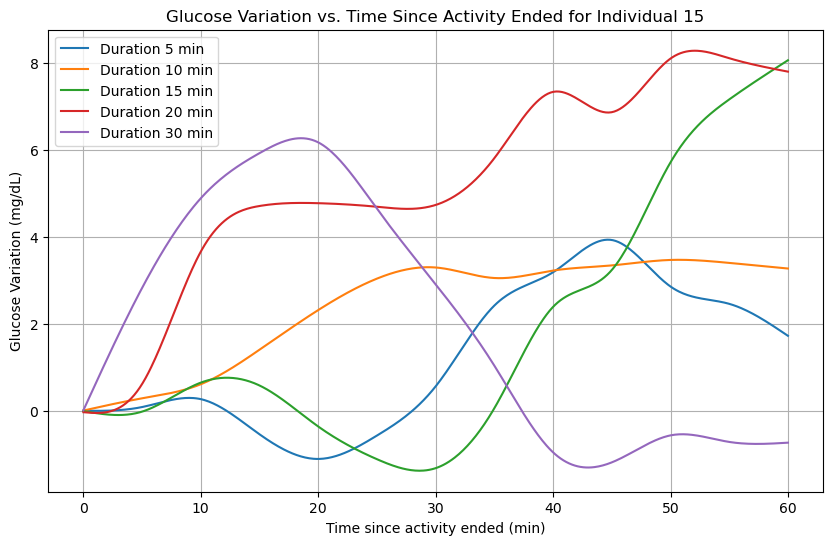

Closest index for duration 5: 0, X value: 5.117561515203716
Closest index for duration 10: 124, X value: 9.984725978479016
Closest index for duration 15: 252, X value: 15.008895747021262
Closest index for duration 20: 379, X value: 19.99381418924677
Skipping duration 30 for individual 16 due to deviation.


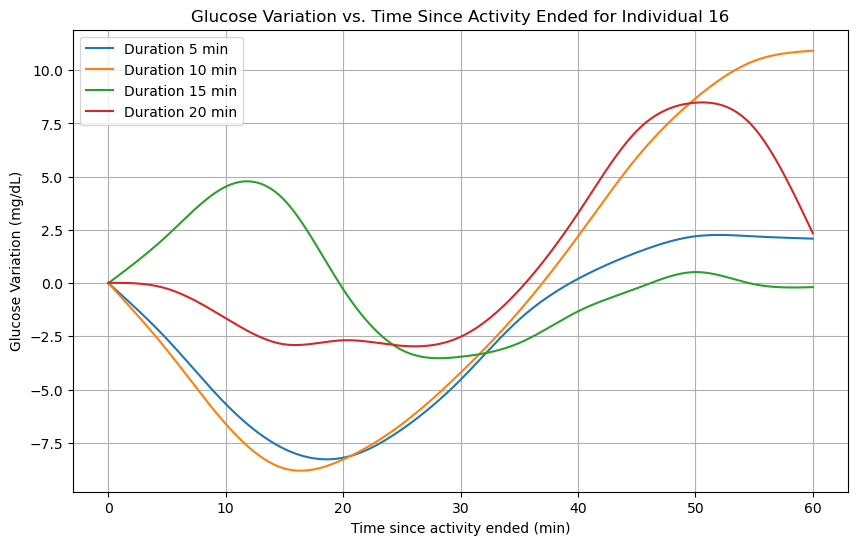

In [4]:
for ind in range(1, 17):
    GAM_slicer_fixed_duration(ind, 0.5)